# MULTIPLE LINEAR REGRESSION

#  1. Exploratory Data Analysis (EDA)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load dataset
df = pd.read_csv('ToyotaCorolla - MLR.csv')
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [6]:
df.shape

(1436, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [10]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [12]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [14]:
df.duplicated().sum()

1

In [16]:
df.drop_duplicates(inplace = True)

In [18]:
df.duplicated().sum()

0

In [20]:
num_cols = df.select_dtypes(include=['int64']).columns
num_cols

Index(['Price', 'Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Weight'],
      dtype='object')

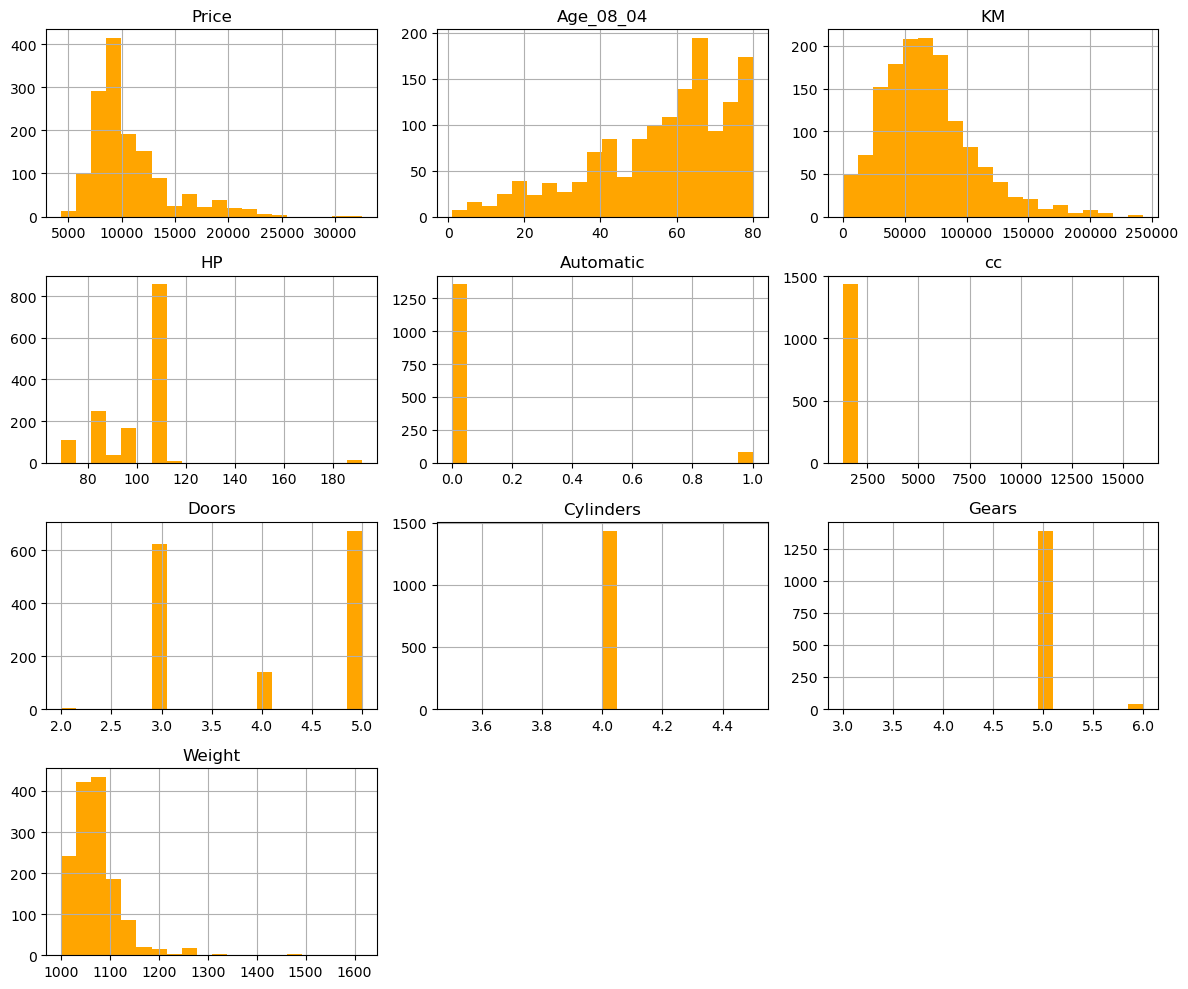

In [22]:
df[num_cols].hist(bins=20, figsize=(12,10), color='orange')
plt.tight_layout()
plt.show()

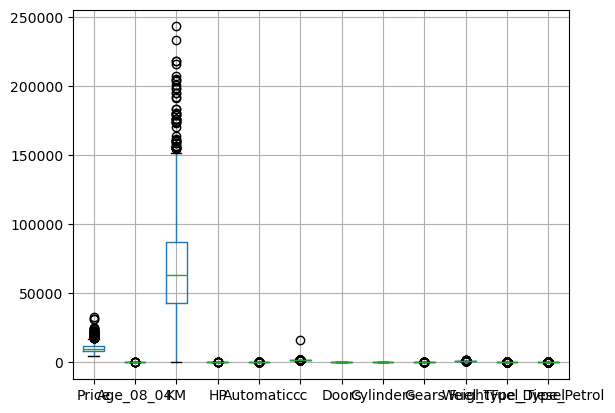

In [34]:
df.boxplot()
plt.show()

In [36]:
def outlier_capping(df,column):
    Q1= df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_bound= Q1-1.5*IQR
    upper_bound= Q3+1.5*IQR
    df[column]= df[column].apply(lambda x: lower_bound if x<lower_bound else upper_bound if x>upper_bound else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)

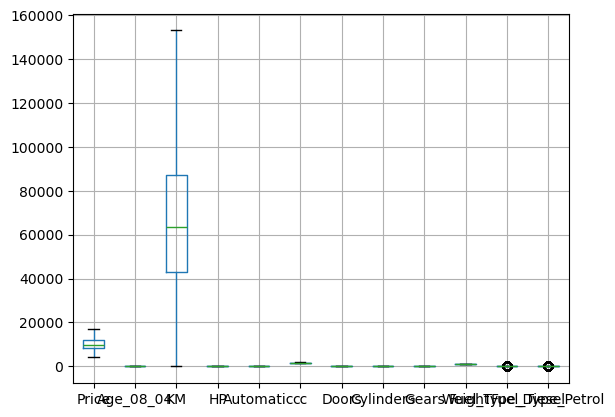

In [38]:
df.boxplot()
plt.show()

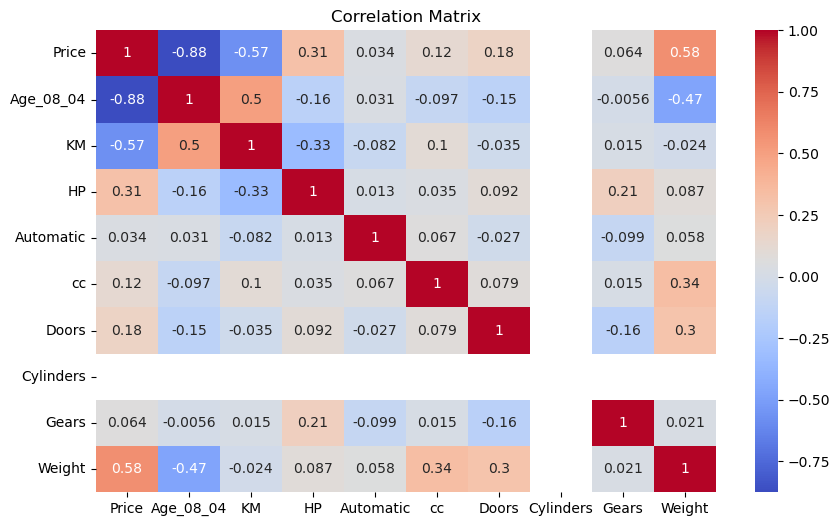

In [24]:
# Check correlation
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

#  2. Data Preprocessing

In [27]:
# Encode categorical variable: FuelType
df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)

In [51]:
# Define features and target
x = df.drop(columns=['Price'])
y = df['Price']

In [55]:
y

0       13500.0
1       13750.0
2       13950.0
3       14950.0
4       13750.0
         ...   
1431     7500.0
1432    10845.0
1433     8500.0
1434     7250.0
1435     6950.0
Name: Price, Length: 1435, dtype: float64

In [57]:
# Split data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1148, 11)
(287, 11)
(1148,)
(287,)


# 3. Multiple Linear Regression Models

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [63]:
# Model 1: All features
model1 = LinearRegression()

In [65]:
model1.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [67]:
y_pred1 = model1.predict(x_test)

In [69]:
print("Model 1 Coefficients:", pd.Series(model1.coef_, index=x.columns))
print("R2 Score:", r2_score(y_test, y_pred1))
print("RMSE:", mean_squared_error(y_test, y_pred1))

Model 1 Coefficients: Age_08_04          -1.049554e+02
KM                 -1.485774e-02
HP                  2.999352e+01
Automatic          -3.694822e-13
cc                 -2.730928e+00
Doors              -1.284072e+02
Cylinders          -1.136868e-13
Gears               0.000000e+00
Weight              2.563973e+01
Fuel_Type_Diesel    9.460781e+02
Fuel_Type_Petrol    1.009305e+03
dtype: float64
R2 Score: 0.8504842513871486
RMSE: 1275108.7184944435


In [71]:
x_train

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
1128,78.0,109263.0,110.0,0.0,1600.0,5,4,5.0,1070.0,False,True
899,62.0,59295.0,86.0,0.0,1300.0,5,4,5.0,1035.0,False,True
1188,71.0,90370.0,86.0,0.0,1300.0,5,4,5.0,1035.0,False,True
311,44.0,38461.0,110.0,0.0,1600.0,5,4,5.0,1080.0,False,True
1145,75.0,101855.0,110.0,0.0,1600.0,5,4,5.0,1070.0,False,True
...,...,...,...,...,...,...,...,...,...,...,...
1096,75.0,125400.0,110.0,0.0,1600.0,3,4,5.0,1050.0,False,True
1131,75.0,107000.0,110.0,0.0,1600.0,3,4,5.0,1050.0,False,True
1295,80.0,71500.0,110.0,0.0,1600.0,4,4,5.0,1035.0,False,True
861,65.0,64630.0,110.0,0.0,1600.0,5,4,5.0,1070.0,False,True


In [75]:
model1.intercept_

-9284.784429719466

In [81]:
rsquare=r2_score(y_test,y_pred1)
rsquare

0.8504842513871486

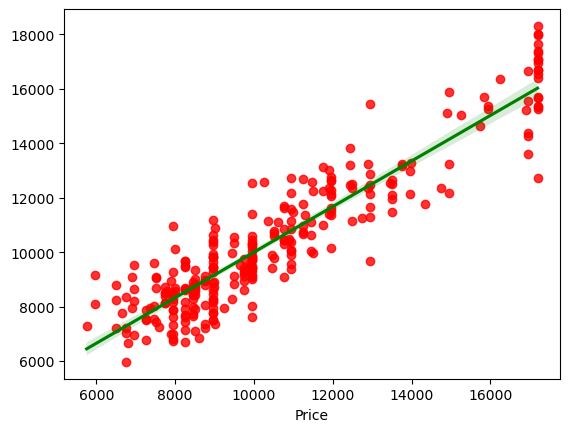

In [85]:
sns.regplot(data=df,x=y_test,y=y_pred1,scatter_kws={'color':'red'},line_kws={'color':'green'})
plt.show()

# 4. Apply Lasso & Ridge Regression

In [87]:
from sklearn.linear_model import Lasso, Ridge

In [89]:
# Ridge Regression
ridge = Ridge(alpha=1.0)

In [91]:
ridge.fit(x_train, y_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [93]:
y_ridge = ridge.predict(x_test)
print("Ridge R2:", r2_score(y_test, y_ridge))

Ridge R2: 0.8500499521409746


In [95]:
# Lasso Regression
lasso = Lasso(alpha=1.0)

In [97]:
lasso.fit(x_train, y_train)

,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [99]:
y_lasso = lasso.predict(x_test)
print("Lasso R2:", r2_score(y_test, y_lasso))

Lasso R2: 0.8498527118820011


In [101]:
y_pred_lasso = lasso.predict(x_test)
y_pred_lasso

array([10184.18081827, 10105.75440926,  9102.54606709,  9316.11417152,
        8873.07643629,  8898.56855398,  8298.81837159,  8362.96099823,
       11628.21261473, 12160.28875168,  9429.96791633,  9307.37707857,
       12574.88894176, 12045.47005632,  8932.29240482, 11480.59969131,
       12137.50015606, 14239.74584778, 11157.36933193, 11381.58821797,
       11242.4932867 , 17385.25951003,  9670.69739722, 10453.77261614,
        7922.19612901, 15231.18639451,  7669.75319343,  8264.00443321,
       15252.11652303, 13240.91478428,  8257.85137887, 10075.58978895,
        9884.59840537,  9954.35541168,  9883.87528395,  8629.6430137 ,
        8664.91061345,  9838.20408695, 15864.61605347, 10430.37420275,
        9107.05049146,  9444.15406909,  9680.17198367,  8572.42590526,
       10328.39101546, 16673.41730658, 10443.97799098,  8997.20372715,
       10289.882093  , 11768.64022075, 12610.11424883,  7008.7228035 ,
       14622.47742045, 15680.79808507,  6782.93088875,  7622.68786228,
      

# Interview Questions
### 1. What is Normalization & Standardization?
- Normalization scales data to [0, 1]. Good for distance-based models (KNN, SVM).
- Standardization scales data to have mean = 0 and std = 1. Essential for models like linear regression, ridge, lasso.

### 2. How to handle multicollinearity in MLR?
- Use VIF (Variance Inflation Factor) to detect collinearity.
- Drop one of the highly correlated features.
- Apply Ridge or Lasso regression which regularize and reduce the impact of multicollinearity.